# ANALISI DATI ESERCIZI 7

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In questo esercizio confronto due metodi di simulazione diversi per calcolare l'energia potenziale, la pressione e la distribuzione radiale di una molecola.

## Esercizio 7.1

In questa prima parte scrivo una funzione su python per calcolare l'autocorrelazione dei dati all'interno di un singolo blocco nella media a blocchi. L'obbiettivo è cercare il numero di dati per blocco ottimale affinchè i dati siano scorrelati tra un blocco e l'altro, in questo modo l'obbiettivo della media a blocchi viene raggiunto.

La funzione di autocorrelazione è definita nella seguente maniera: $$ \chi(t)=\frac{\langle \ x(\ \bar{t} \ ) \cdot x(\ \bar{t}+t \ ) \ \rangle -\langle x( \ \bar{t} \ ) \rangle \cdot \langle x( \ \bar{t}+ t \ ) \rangle }{\sigma_ x^2}$$


Ho calcolato quindi quanto fosse il numero di valori necessari per ogni blocco per tutte e 3 le fasi. Per fare ciò ho misurato i valori istantanei di Energia interna e pressione per un numero totale di $M=10^4$ volte, dopo aver equilibrato il sistema.

Oltre alla funzione di auto correlazione ho calcolato l'errore sull'ultimo blocco di ogni simulazione con un numero di elementi per ogni blocco variabile, da un minimo di 10 elementi per blocco fino ad un massimo di 5000 elementi.

In [3]:
def autocorrelation(U):
    tmax = len(U)
    autoc = np.zeros(tmax)
    var_U = np.var(U)
    for t in range (tmax-1):
        norm = tmax - t
        sum1 = 0.
        sum2a = 0.
        sum2b = 0.
        for tprimo in range(tmax-t):
            sum1 += U[tprimo] * U[tprimo+t]
            sum2a += U[tprimo]
            sum2b += U[t+tprimo]

        autoc [t]  = (sum1 - sum2a*sum2b/norm) / var_U / norm
        if (t==0):
            autoc[0] = 1

    return autoc

In [4]:
def last_blocking_error(U, per_block):    
    n_blocks=int(len(U)/per_block)
    blocks=np.zeros(n_blocks)
    for i in range(n_blocks):
        blocks[i]=np.sum(U[i*per_block:(i+1)*per_block])
    blocks/=per_block
    blocks2=blocks*blocks
    
    blocks=np.sum(blocks)/n_blocks
    blocks2=np.sum(blocks2)/n_blocks
    err=np.sqrt((blocks2 - blocks**2)/(n_blocks))
        
    return err

## Solido

In [5]:
istant_energy_solid = np.loadtxt("MonteCarlo_NVT/Solid_result/corr_energy.txt")
istant_press_solid = np.loadtxt("MonteCarlo_NVT/Solid_result/corr_pressure.txt")

In [8]:
solid_press_correlation=autocorrelation(istant_press_solid[0:10000])
solid_energy_correlation=autocorrelation(istant_energy_solid[0:10000])

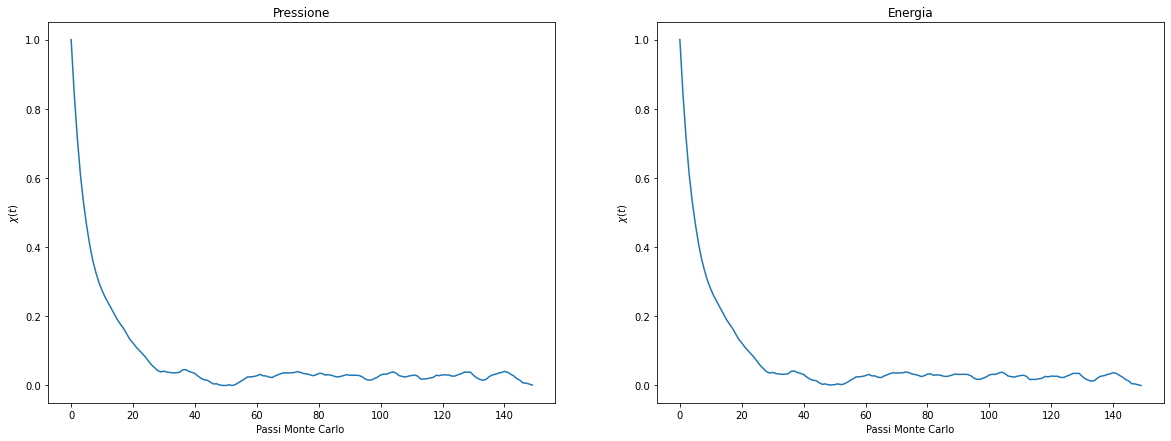

In [9]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))  ;

idx=150
x=np.arange(len(solid_press_correlation[:idx]))
ax[0].plot(solid_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo ")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(solid_energy_correlation[:idx]));
ax[1].plot(solid_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

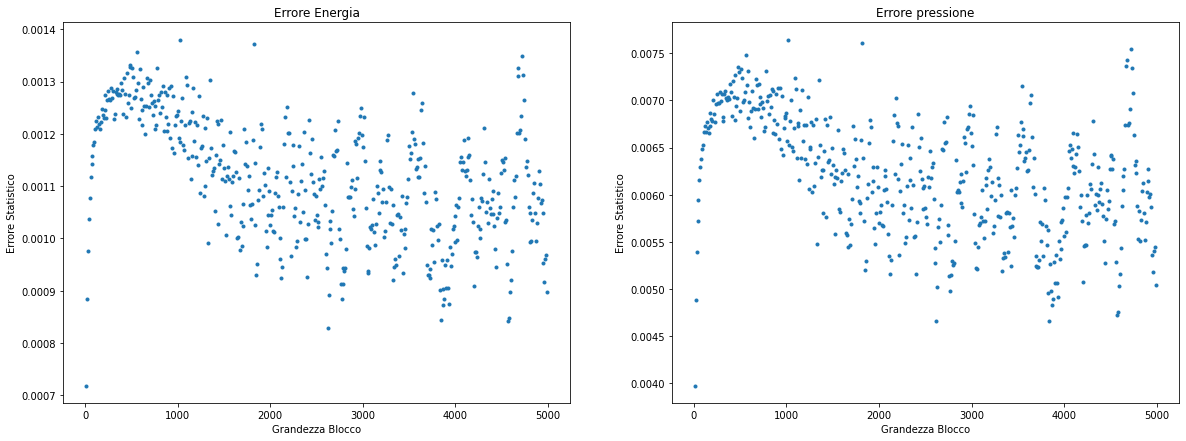

In [13]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_solid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Blocco")
ax[0].set_ylabel("Errore Statistico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_solid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore pressione")

plt.show()



## Liquido

In [7]:
istant_energy_liquid = np.loadtxt("MonteCarlo_NVT/Liquid_result/corr_energy.txt")
istant_press_liquid = np.loadtxt("MonteCarlo_NVT/Liquid_result/corr_pressure.txt")

In [13]:
liquid_press_correlation=autocorrelation(istant_press_liquid[0:10000])
liquid_energy_correlation=autocorrelation(istant_energy_liquid[0:10000])

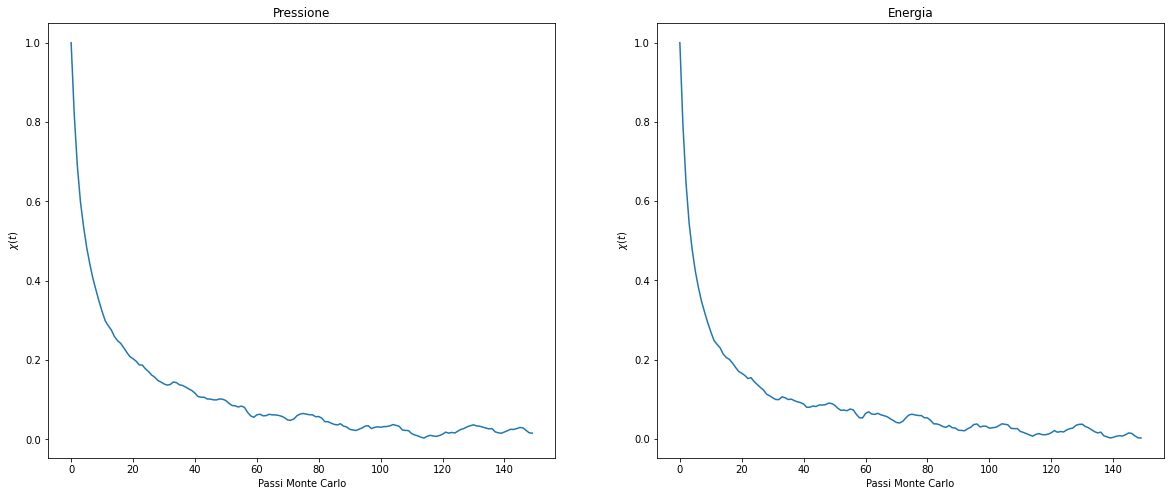

In [14]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))  ;

idx=150
x=np.arange(len(liquid_press_correlation[:idx]))
ax[0].plot(liquid_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(liquid_energy_correlation[:idx]));
ax[1].plot(liquid_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

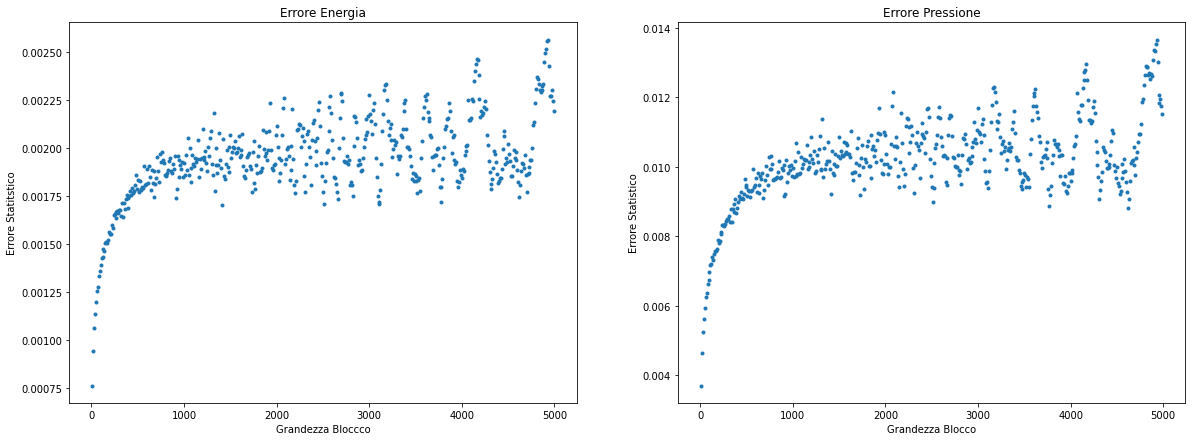

In [12]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_liquid, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Bloccco")
ax[0].set_ylabel("Errore Statitstico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_liquid, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore Pressione")

plt.show()




## Gas

In [9]:
istant_energy_gas = np.loadtxt("MonteCarlo_NVT/Gas_result/corr_energy.txt")
istant_press_gas = np.loadtxt("MonteCarlo_NVT/Gas_result/corr_pressure.txt")

In [18]:
gas_press_correlation=autocorrelation(istant_press_gas[0:10000])
gas_energy_correlation=autocorrelation(istant_energy_gas[0:1000])

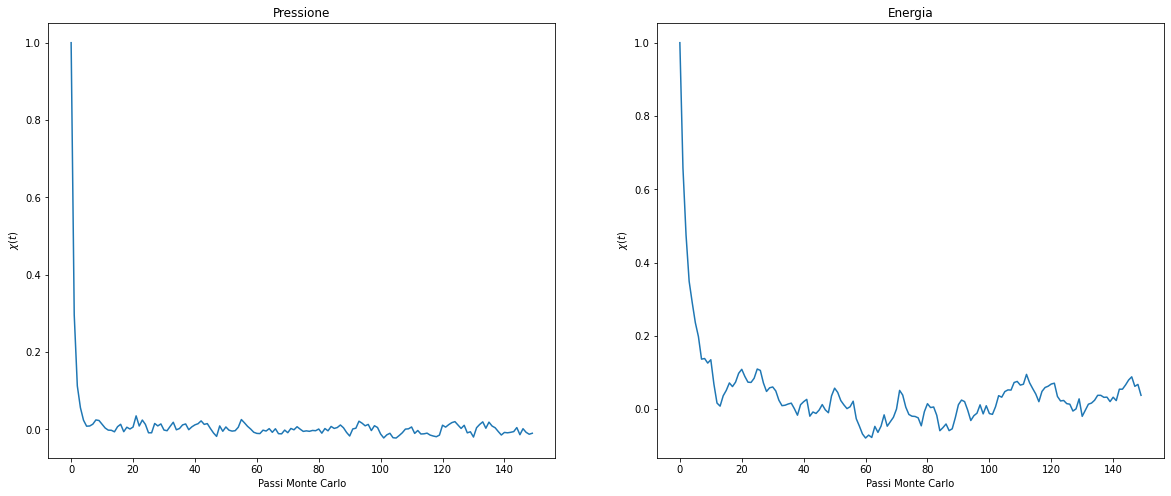

In [19]:
fig,ax = plt.subplots(1, 2, figsize=(20, 8))  ;

idx=150
x=np.arange(len(gas_press_correlation[:idx]))
ax[0].plot(gas_press_correlation[:idx])
ax[0].set_title("Pressione")
ax[0].set_xlabel("Passi Monte Carlo")
ax[0].set_ylabel("$\chi(t)$")


x=np.arange(len(gas_energy_correlation[:idx]));
ax[1].plot(gas_energy_correlation[:idx]);
ax[1].set_title("Energia");
ax[1].set_xlabel("Passi Monte Carlo");
ax[1].set_ylabel("$\chi(t)$");

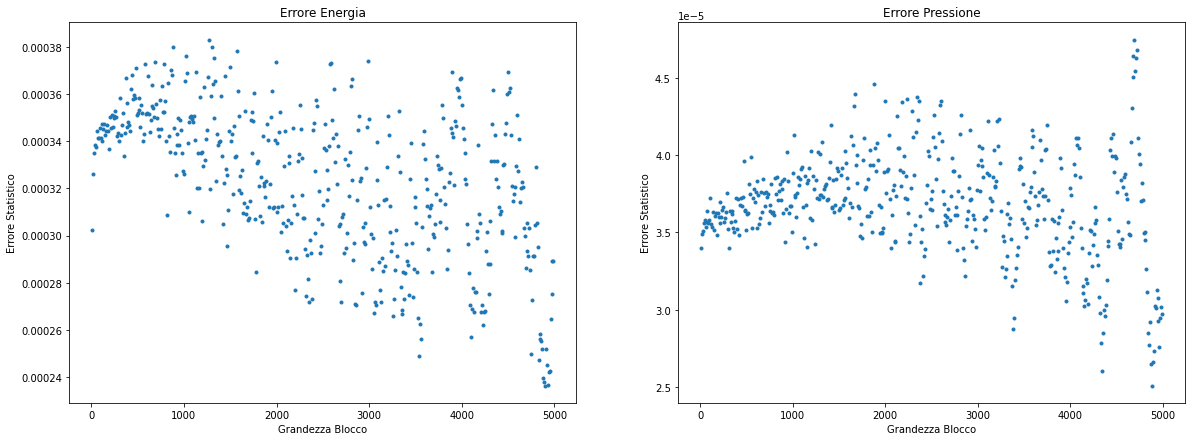

In [11]:
fig,ax = plt.subplots(1, 2, figsize=(20, 7))
#Energy error

errors=[]
value=[]
blk_size=[]  
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_energy_gas, i))
ax[0].plot(blk_size, errors, linestyle="", marker=".")
ax[0].set_xlabel("Grandezza Blocco")
ax[0].set_ylabel("Errore Statistico")
ax[0].set_title("Errore Energia")


#istant_press_solid 
errors=[]
value=[]
blk_size=[]
    
for i in range (10, 5000,10):
    blk_size.append(i)
    errors.append(last_blocking_error(istant_press_gas, i))
ax[1].plot(blk_size, errors, linestyle="", marker=".")
ax[1].set_xlabel("Grandezza Blocco")
ax[1].set_ylabel("Errore Statistico")
ax[1].set_title("Errore Pressione")

plt.show()




Le funzioni di autocorrelazione delle 3 fasi vanno a zero a valori diversi. Per la fase solida sono necessari 50 passi, mentre per quella liquida ce ne vogliono circa il doppio. Per quanto riguarda, invece,  quella gassosa la funzione di autocorrelazione va a 0 molto più velocemente, bastano meno di una decina di passi.

Quando i numero di step Monte Carlo per blocco supera il tempo di correlazione, l'errore si stabilizza e vediamo delle oscillazioni attorno a quel valore.

## Esercizio 7.4 (ARGON)


Nell'ultima parte dell'esercizio confronto i risultati ottenuti dal codice di simulazione Monte Carlo e dal codice di dinamica Molecolare con l'algoritmo di Verlet.

Anche nel codice Monte Carlo ho eseguito codice 3 volte per raggiungere l'equilibrio e successivamente ho utilizzato le posizioni finali per cominciare la misurazioni delle grandezze.

Ho eseguito un totale di $M=10^5$ simulazioni e per il calcolo dell'incertezza ho utilizzato una media a blocchi con 100 blocchi. La stessa cosa è stata eseguita per il codice con l'algoritmo di Verlet.

In [3]:
#physical parameters

k_boltzman=1.38064852*1E-23

#parameters for argon
sigma_argon = 0.34    
epsilon_boltzman_argon = 120  #e/kB
epsilon_argon=epsilon_boltzman_argon*k_boltzman
sigma_si_argon=sigma_argon*1E-9
mass_argon = 39.948*1.66054*1E-27

## Gas

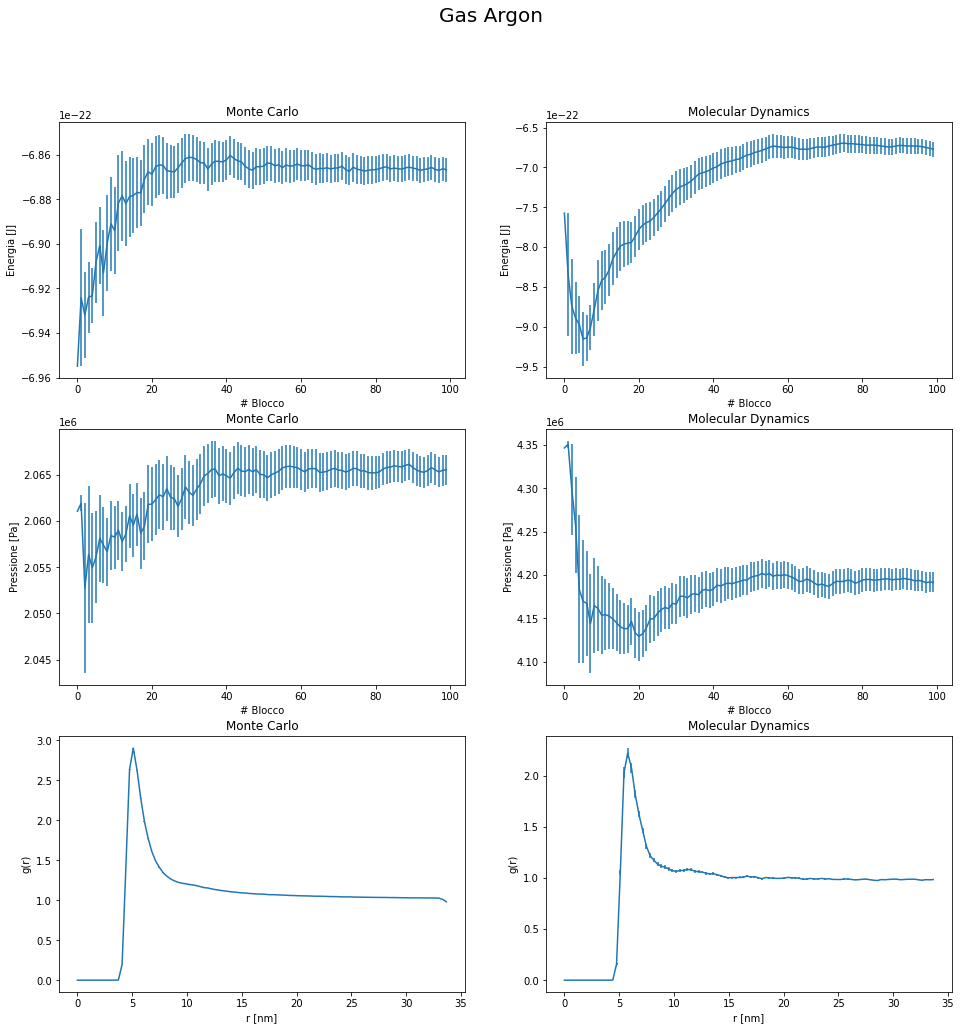

In [7]:
g = np.loadtxt("MonteCarlo_NVT/Gas_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Gas_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Gas_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Gas_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Gas_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Gas_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Gas Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,2]*epsilon_argon, yerr=energy_mol[:,3]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Blocco")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Liquid

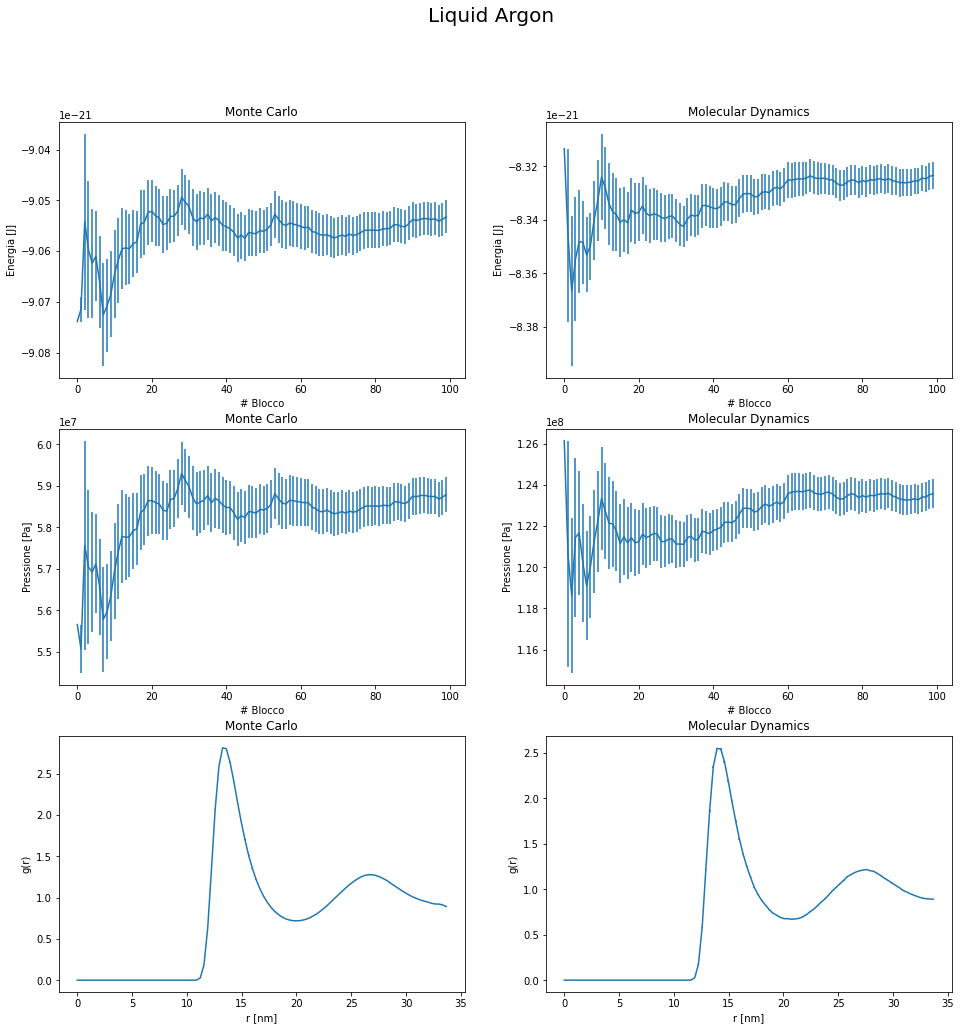

In [4]:
g = np.loadtxt("MonteCarlo_NVT/Liquid_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Liquid_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Liquid_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Liquid_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Liquid_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Liquid_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Liquid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,2]*epsilon_argon, yerr=energy_mol[:,3]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Blocco")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

## Solid

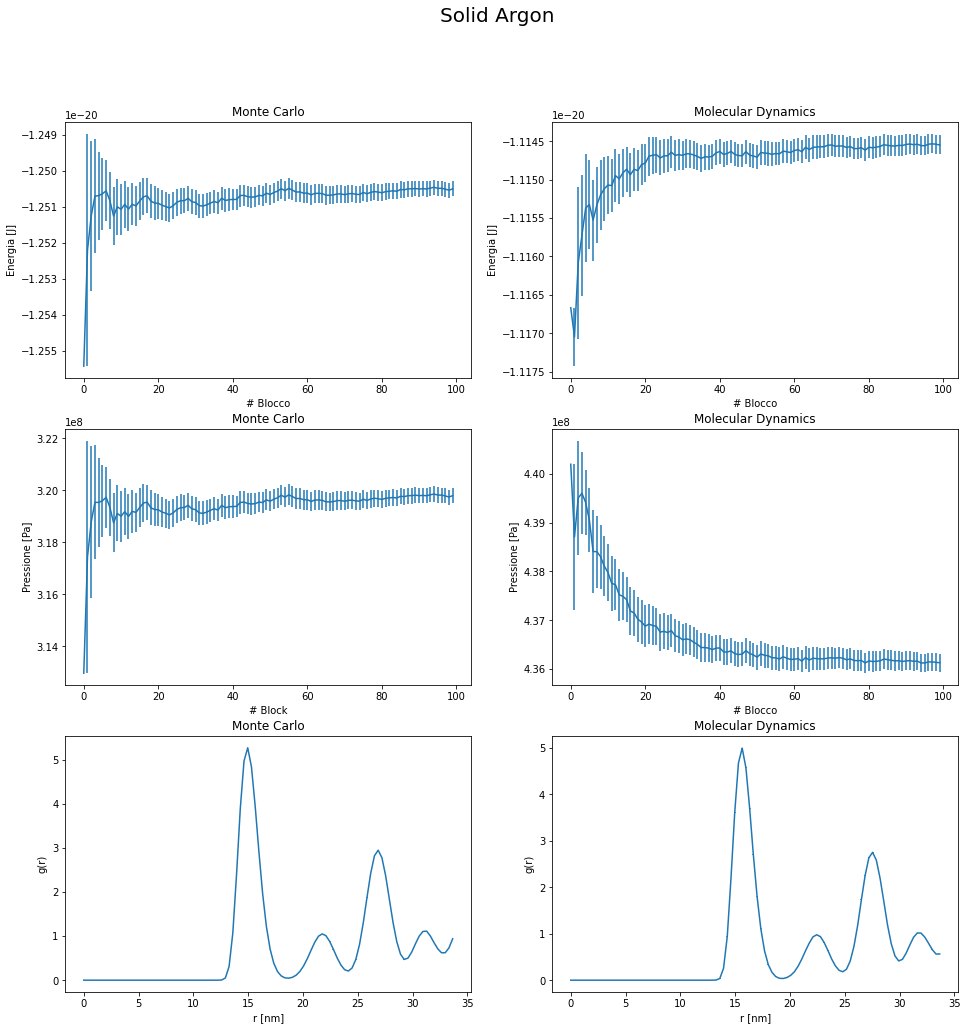

In [6]:
g = np.loadtxt("MonteCarlo_NVT/Solid_result/output.gave.0")
energy = np.loadtxt("MonteCarlo_NVT/Solid_result/output.epot.0")
pres =np.loadtxt("MonteCarlo_NVT/Solid_result/output.press.0")

g_mol = np.loadtxt("MolecularDynamics_NVE/Solid_result/output_gave.out")
energy_mol=np.loadtxt("MolecularDynamics_NVE/Solid_result/ave.epot.out")
pres_mol=np.loadtxt("MolecularDynamics_NVE/Solid_result/ave.pres.out")

fig,ax = plt.subplots(3, 2, figsize=(16, 16));
fig.suptitle("Solid Argon", fontsize=20)

#energy
ax[0][0].errorbar(range(len(energy)), energy[:,2]*epsilon_argon, yerr=energy[:,3]*epsilon_argon)
ax[0][0].set_ylabel("Energia [J]")
ax[0][0].set_xlabel("# Blocco")
ax[0][0].set_title("Monte Carlo")

ax[0][1].errorbar(range(len(energy_mol)), energy_mol[:,2]*epsilon_argon, yerr=energy_mol[:,3]*epsilon_argon)
ax[0][1].set_ylabel("Energia [J]")
ax[0][1].set_xlabel("# Blocco")
ax[0][1].set_title("Molecular Dynamics")

#press
ax[1][0].errorbar(range(len(pres)), pres[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][0].set_ylabel("Pressione [Pa]")
ax[1][0].set_xlabel("# Block")
ax[1][0].set_title("Monte Carlo")

ax[1][1].errorbar(range(len(pres_mol)), pres_mol[:,2]*epsilon_argon/(sigma_si_argon**3), yerr=pres_mol[:,3]*epsilon_argon/(sigma_si_argon**3))
ax[1][1].set_ylabel("Pressione [Pa]")
ax[1][1].set_xlabel("# Blocco")
ax[1][1].set_title("Molecular Dynamics")

ax[2][0].errorbar(np.arange(0,100)*sigma_argon,g[:,2],yerr=g[:,3])
ax[2][0].set_xlabel("r [nm]")
ax[2][0].set_ylabel("g(r)")
ax[2][0].set_title("Monte Carlo")

ax[2][1].errorbar(np.arange(0,100)*sigma_argon,g_mol[:,0],yerr=g_mol[:,1])
ax[2][1].set_xlabel("r [nm]")
ax[2][1].set_ylabel("g(r)")
ax[2][1].set_title("Molecular Dynamics");

In grafico il confronto tra i risulati delle simulazioni utilizzano i due codici. I risulati sono espresse in unità naturali.

Le stime dei due codici risultano essere abbastanza simili per tutte le grandezze e per tutte e 3 le fasi del argon. La differenza può essere notata nell'incertezza. Per il Monte Carlo trovo incertezze molto minori rispetto al codice di dinamica molecolare, sopratutto nel calcolo di $g(r)$.